In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy.interpolate import interp1d
import pickle

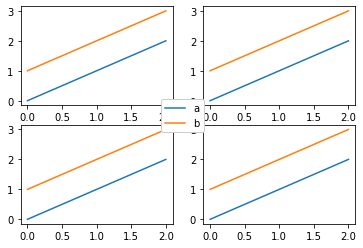

In [2]:
fig,ax=plt.subplots(2,2)
pts=np.array([0,1,2])
line1,=ax[0,0].plot(pts,label='a')
line2,=ax[0,0].plot(pts+1,label='b')

[ax.plot(pts,label='a') for ax in ax.flatten()[1:]]
[ax.plot(pts+1,label='b') for ax in ax.flatten()[1:]]
fig.legend((line1,line2),('a','b'),loc=10, bbox_to_anchor=(.5,.5),framealpha=1)

In [ ]:
data=loadmat('Zeeman.mat')

In [ ]:
fig,ax=plt.subplots()
ax.plot(data['Tlist'].flatten(),(data['gaplist_SC']-data['gaplist_N']).flatten(),'.',color='b')
ax.set_xlabel('$E_Z$',color='b')
ax.set_ylabel('$\Delta$')
ax.tick_params(axis='y', labelcolor='b')

ax2=ax.twinx()
ax2.plot(data['Tlist'].flatten(),(data['htotlist_SC']-data['htotlist_N']).flatten(),'.',color='r')
ax2.set_ylabel('$\Delta E$',color='r')
ax2.tick_params(axis='y', labelcolor='r')




In [ ]:
f=interp1d((data['htotlist_SC']-data['htotlist_N']).flatten()[:12],data['Tlist'].flatten()[:12])

In [ ]:
f(0)

In [ ]:
1/np.sqrt(2)

In [ ]:
fig,ax=plt.subplots(2,1)
[ax.plot([0,1],[0,2]) for ax in ax]
# ax.set_xlim([0,2])
ax[0].text(0.05,0.5,'Text',ha='center',va='center',transform=fig.transFigure)

In [ ]:
ax[0]

In [ ]:
import kwant

In [ ]:
param={'a':1,'mp':1,'mn':.5,'Ep':0,'En':0,'L':10}

In [ ]:
def make_system(param):
    a=param['a']
    mn=param['mn']
    mp=param['mp']
    Ep=param['Ep']
    En=param['En']
    L=param['L']
    
    tp=1/(2*mp*a*a)
    tn=1/(2*mn*a*a)
    t_int=np.sqrt(tn*tp)

    lat = kwant.lattice.chain(a)
    syst = kwant.Builder()
    syst[(lat(x) for x in range(L-1))]=2*tn-En
    syst[(lat(x+L) for x in range(L-1))]=2*tp-Ep
    syst[lat(L-1)]=tn+t_int-En
    syst[lat(2*L-1)]=tp+t_int-Ep
    for i in range(L-1):
        syst[lat(i),lat(i+1)]=-tn
        syst[lat(i+L),lat(i+L+1)]=-tp
        
    syst[lat(L-1),lat(L)]=-t_int
    
    leadn=kwant.Builder(kwant.TranslationalSymmetry([-a]))
    leadn[lat(0)]=2*tn-En
    leadn[lat(0),lat(1)]=-tn
    syst.attach_lead(leadn)
    leadp=kwant.Builder(kwant.TranslationalSymmetry([a]))
    leadp[lat(0)]=2*tp-Ep
    leadp[lat(0),lat(1)]=-tp
    syst.attach_lead(leadp)

    syst=syst.finalized()
    return syst

In [ ]:
syst=make_system(param)

In [ ]:
kwant.plot(syst)

In [ ]:
plt.imshow(np.real(syst.hamiltonian_submatrix()))

In [ ]:
energies=np.linspace(0.1,5,60)+30

In [ ]:
r=0*energies

In [ ]:
for index,energy in enumerate(energies):
    smatrix = kwant.smatrix(syst, energy)
    r[index]=smatrix.transmission(0,0)

In [ ]:
fig,ax=plt.subplots()
ax.plot(energies,r)
ax.axhline(y=reflection(0.2,param))
# ax.set_ylim([0,0.2])

In [ ]:
r

In [ ]:
kwant.smatrix(syst,2.01)

In [ ]:
fig,ax=plt.subplots()
ax.plot(energies,r)
ax.axhline(y=reflection(0.1,param))
# ax.set_ylim([0,0.2])

In [ ]:
def reflection(E,param):
    mn=param['mn']
    mp=param['mp']
    Ep=param['Ep']
    En=param['En']
    
    kn=np.sqrt(2*mn*(E-En))
    kp=np.sqrt(2*mp*(E-Ep))
    return ((kn-kp)/(kn+kp))**2
    

In [ ]:
reflection(0.1,param)

In [ ]:
smatrix.transmission(1,1)

In [ ]:
smatrix.transmission(0,0)

In [ ]:
z=loadmat('Nk(80,100,50)g5.550000ED50.000000.mat')

In [ ]:
z.keys()

In [ ]:
z['dlist'].shape

In [ ]:
plt.plot(np.mean(z['dlist'],axis=(0,1)))

In [ ]:
plt.plot(z['htotlist'].flatten())

In [ ]:
plt.pcolormesh(z['dlist'][:,:,-1])

# Show_plot

In [6]:
def show_plot(data,label):
    fig,ax=plt.subplots(2,2)
    ax[0,0].plot(np.mean(data['dlist'][:,-60:,:],(0,1)))
    ax[0,0].text(.5,1,'mean delta = {:f}meV'.format(1000*np.mean(data['dlist'][:,-60:,:],(0,1))[-1]),ha='center',va='bottom',transform=ax[0,0].transAxes)
    ax[0,1].plot(data['htotlist'][0])
    gs = ax[1, 0].get_gridspec()
    ax[1,0].remove()
    ax[1,1].remove()
    axbig = fig.add_subplot(gs[1,:])
    axbig.pcolormesh(data['dlist'][:,:,-1])
    ax[0,0].text(0,1,label,transform=ax[0,0].transAxes,ha='right',va='bottom')
    return 1000*np.mean(data['dlist'][:,-60:,:],(0,1))[-1]

In [6]:
np.concatenate((np.arange(50,150,20),np.arange(150,501,50),np.arange(600,1101,100)))

array([  50,   70,   90,  110,  130,  150,  200,  250,  300,  350,  400,
        450,  500,  600,  700,  800,  900, 1000, 1100])

In [2]:
Nk61={}
for i in np.concatenate((np.arange(50,150,20),np.arange(150,501,50),np.arange(600,1101,100))):
    Nk61[i]=loadmat('Nk(61,100,{:d})g9.10ED1.0.mat'.format(i))

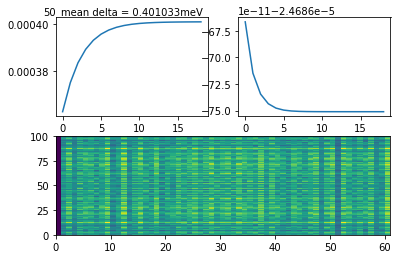

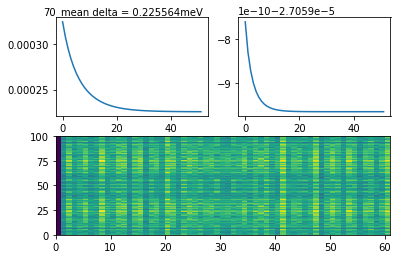

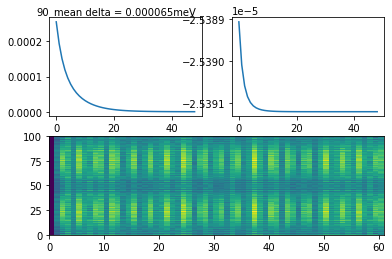

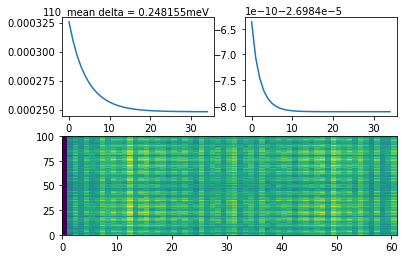

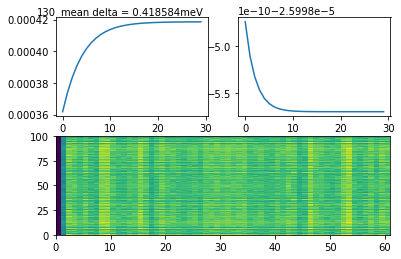

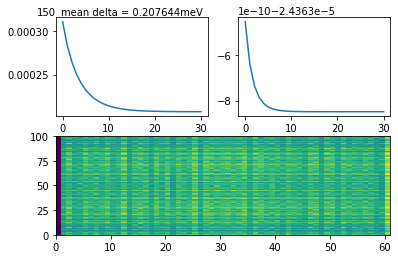

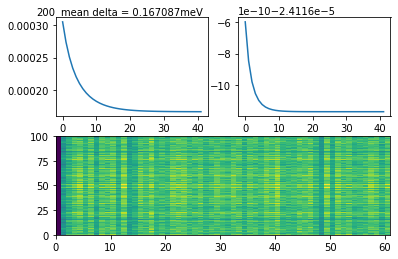

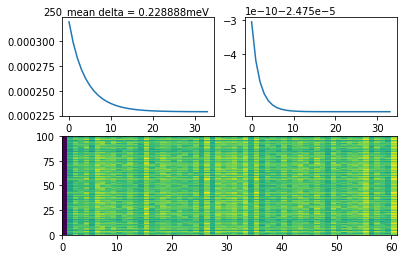

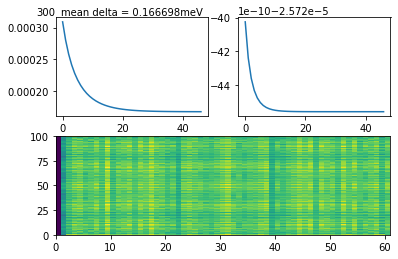

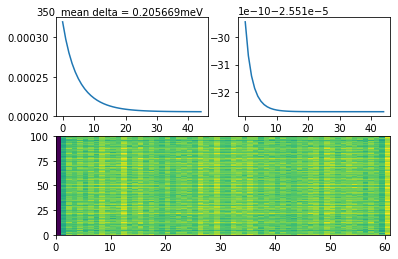

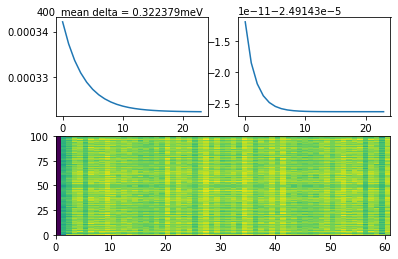

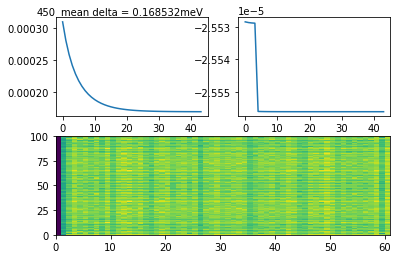

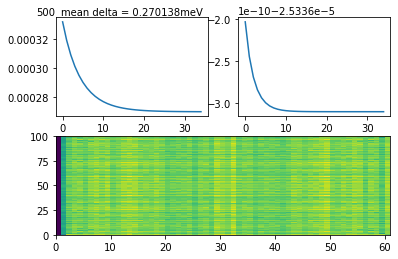

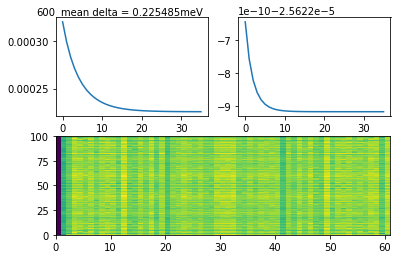

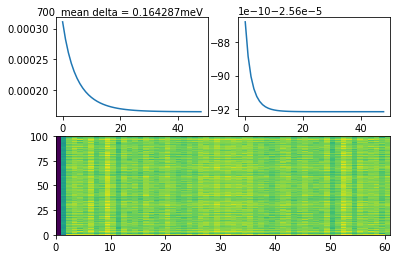

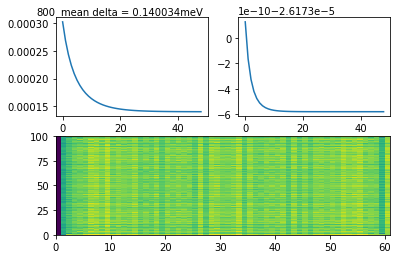

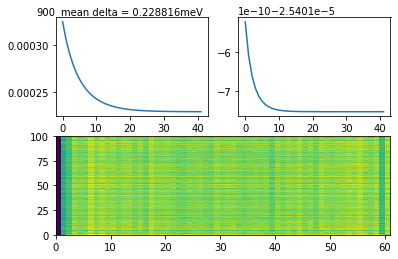

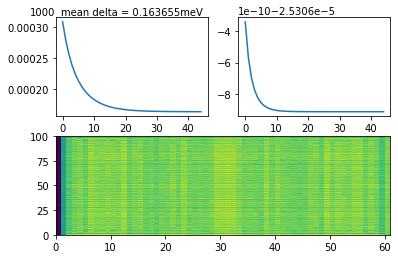

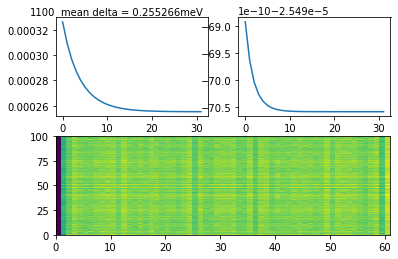

In [8]:
for i in np.concatenate((np.arange(50,150,20),np.arange(150,501,50),np.arange(600,1101,100))):
    show_plot(Nk61[i],i)


# Show plot pickle

In [8]:
def show_plot_pickle(data):
    fig,ax=plt.subplots(2,2)
    ax[0,0].plot(data['Delta_mean_list'])
    ax[0,0].text(.5,1,'mean delta = {:f}meV'.format(1000*data['Delta_mean_list'][-1]),ha='center',va='bottom',transform=ax[0,0].transAxes)
    # ax[0,1].plot(data['htotlist'][0])
    gs = ax[1, 0].get_gridspec()
    ax[1,0].remove()
    ax[1,1].remove()
    axbig = fig.add_subplot(gs[1,:])
    axbig.scatter(np.array(list(data['Delta'].keys()))[:,0]/0.05076,np.array(list(data['Delta'].keys()))[:,1]/0.05076,c=np.array(list(data['Delta'].values())))
    ax[0,0].text(0,1,'Al:[{},{},{}]'.format(data['N_Al'][0],data['N_Al'][1],data['N_Al'][2]),transform=ax[0,0].transAxes,ha='right',va='bottom')
    return 1000*data['Delta_mean_list'][-1]


In [2]:
fnlist=[i for i in os.listdir('python') if 'pickle' in i]

27

In [76]:
i=fnlist[1]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)

KeyboardInterrupt: 

In [9]:
data_fn=[]
delta_list=[]
dim_list=[]
# for i in fnlist[:5]:
#     with open('python/{}'.format(i),'rb') as f:
#         z=pickle.load(f)
#     data_fn.append(z)
#     dim_list.append(z['N_Al'])
#     delta_list.append(show_plot_pickle(z))

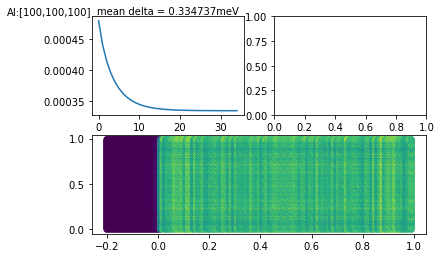

In [6]:
i=fnlist[0]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

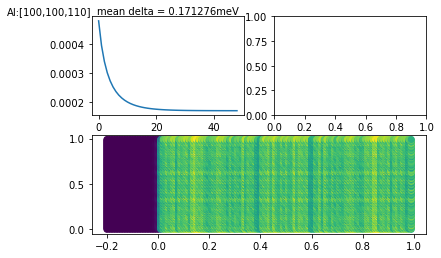

In [7]:
i=fnlist[1]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

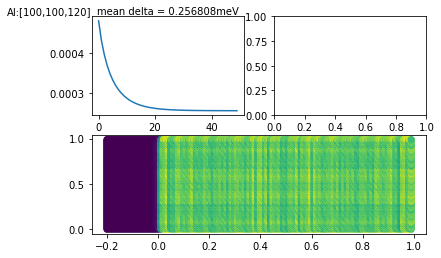

In [8]:
i=fnlist[2]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

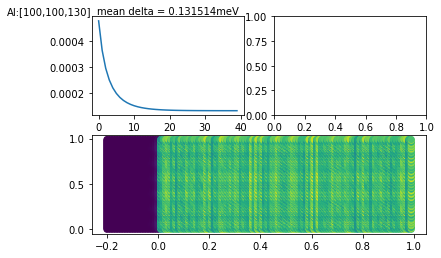

In [9]:
i=fnlist[3]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

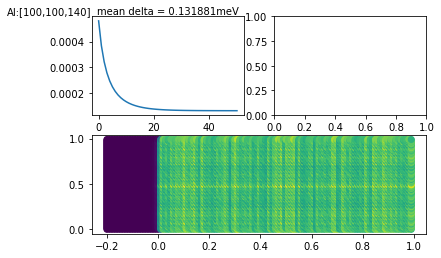

In [10]:
i=fnlist[4]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

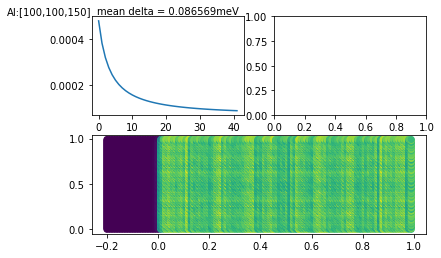

In [11]:
i=fnlist[5]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

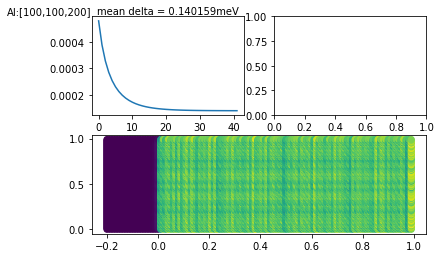

In [12]:
i=fnlist[6]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

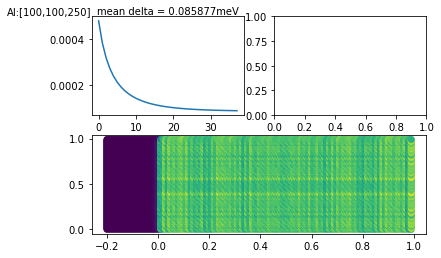

In [13]:
i=fnlist[7]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

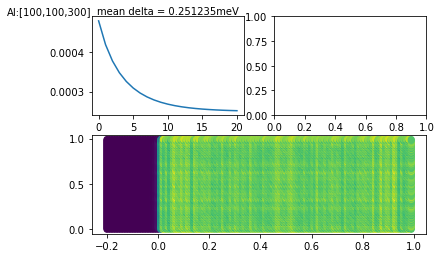

In [14]:
i=fnlist[8]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

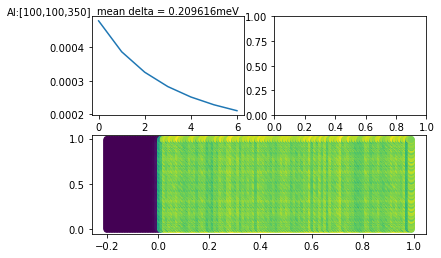

In [15]:
i=fnlist[9]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

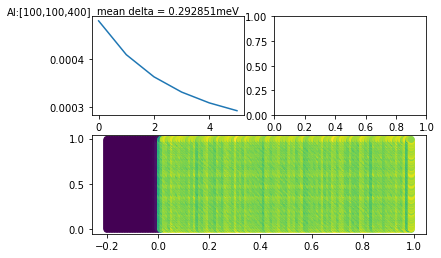

In [16]:
i=fnlist[10]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

In [17]:
i=fnlist[11]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

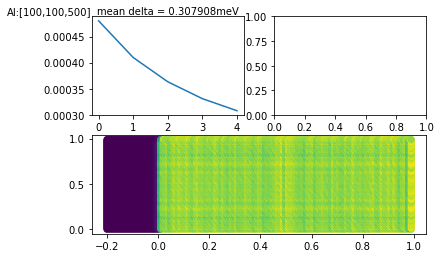

In [5]:
i=fnlist[12]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

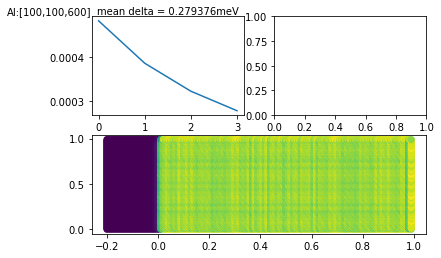

In [6]:
i=fnlist[13]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

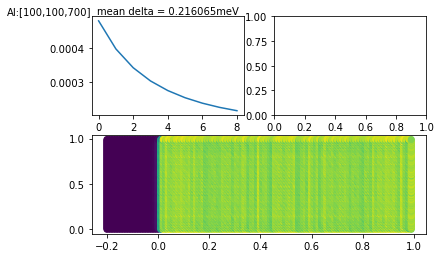

In [7]:
i=fnlist[14]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

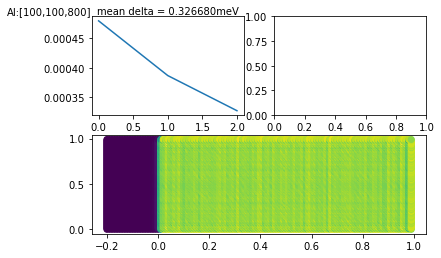

In [8]:
i=fnlist[15]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

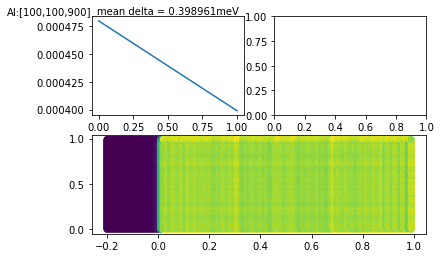

In [9]:
i=fnlist[16]
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

In [3]:
# i=fnlist[17]
i="Lz100.000g5.60ED1.00.pickle"
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

NameError: name 'data_fn' is not defined

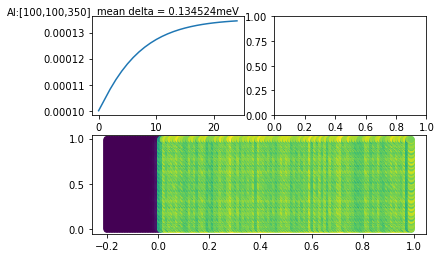

In [10]:
i='Lz35.000g5.60ED1.00.pickle'
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

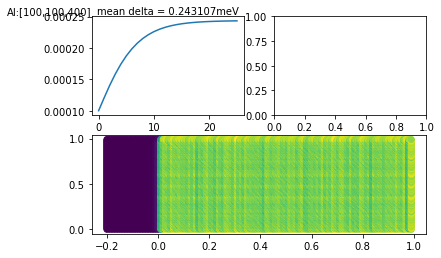

In [11]:
i='Lz40.000g5.60ED1.00.pickle'
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

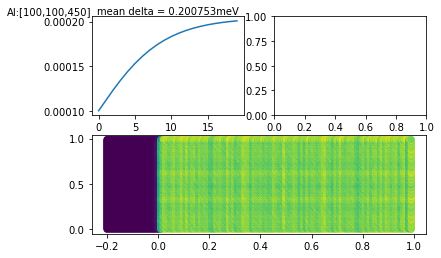

In [12]:
i='Lz45.000g5.60ED1.00.pickle'
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

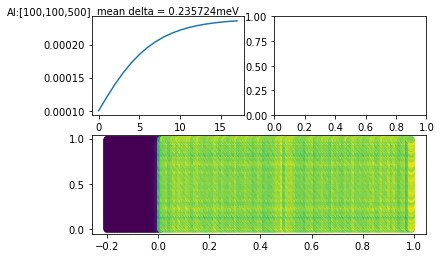

In [13]:
i='Lz50.000g5.60ED1.00.pickle'
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

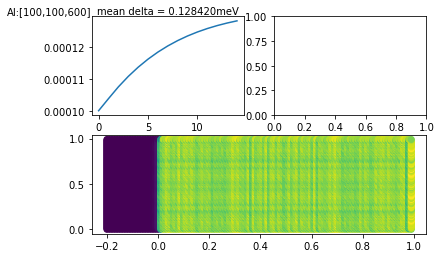

In [14]:
i='Lz60.000g5.60ED1.00.pickle'
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

In [2]:
i='Lz70.000g5.60ED1.00.pickle'
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

MemoryError: 

In [3]:
i='Lz80.000g5.60ED1.00.pickle'
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

MemoryError: 

In [ ]:
i='Lz90.000g5.60ED1.00.pickle'
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

NameError: name 'data_fn' is not defined

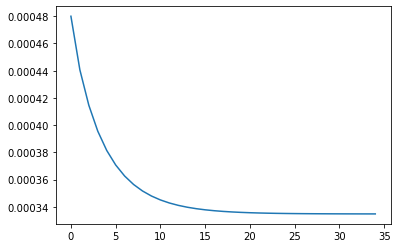

In [ ]:
i='Lz100.000g5.60ED1.00.pickle'
with open('python/{}'.format(i),'rb') as f:
    z=pickle.load(f)
data_fn.append(z)
dim_list.append(z['N_Al'])
delta_list.append(show_plot_pickle(z))

In [29]:
z.key

dict_keys(['a', 'L_Al', 'L_FM', 'm_Al', 'm_FM', 'EF_Al', 'EF_FM', 'h_exc', 'g', 'E_D', 'T', 'U_D', 'Delta_0', 'periodic_boundary_condition', 'verbose', 'N_Al', 'N_FM', 's0', 'sx', 'sy', 'sz', 'b', 't_Al', 't_FM', 'm_int', 't_int', 'disorder', 'Delta', 'Delta_array', 'wfall', 'energyall', 'store_history', 'Delta_mean', 'kz_list', 'energy_Al', 'energy_FM', 'estimate', 'Delta_mean_list', 'F_D'])

Text(0, 1, '100')

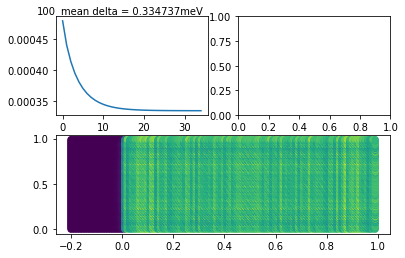

In [65]:
for 
    fig,ax=plt.subplots(2,2)
    ax[0,0].plot(data['Delta_mean_list'])
    ax[0,0].text(.5,1,'mean delta = {:f}meV'.format(1000*data['Delta_mean_list'][-1]),ha='center',va='bottom',transform=ax[0,0].transAxes)
    # ax[0,1].plot(data['htotlist'][0])
    gs = ax[1, 0].get_gridspec()
    ax[1,0].remove()
    ax[1,1].remove()
    axbig = fig.add_subplot(gs[1,:])
    axbig.scatter(np.array(list(data['Delta'].keys()))[:,0]/0.05076,np.array(list(data['Delta'].keys()))[:,1]/0.05076,c=np.array(list(data['Delta'].values())))
    ax[0,0].text(0,1,'{}'.format(data['N_Al'][2]),transform=ax[0,0].transAxes,ha='right',va='bottom')


In [62]:
z['L_Al']/0.05076

array([1., 1., 1.])

In [11]:
z=pickle.load('python/{}'.format(fnlist[0]))

TypeError: file must have 'read' and 'readline' attributes

In [21]:
fnlist[0]

'Lz0.010g5.60ED1.00.pickle'